# Practice Session AI: Data Science

In [1]:
# vul in

print("Naam:", "Kennes")
print("Voornaam:", "Dries")
print("S-nummer:", "R0486630")
print("Richting:", "E-ICT")

# druk <ctrl> + <enter>

Naam: Kennes
Voornaam: Dries
S-nummer: R0486630
Richting: E-ICT


Welkom bij de eerste labosessie van Artificiële Intelligentie! In deze sessie maken we kennis met enkele belangrijke concepten uit de *Data Science*, het onderzoeksveld dat de kracht van statistiek, algebra en computerwetenschappen combineert en deze afvuurt op data. In de laatste 10-15 jaar heeft deze branche enorm aan belang gewonnen door de exponentieel stijgende groei van het internet, de dalende prijs van opslagruimte en de opkomende wensen van de bedrijfswereld om *Big Data* te gebruiken als leiddraad voor belangrijke beslissingen.

Dit document is een zogenaamde ``IPython Notebook``. Een notebook bevat een mix van pure tekst en uitvoerbare code, en is uitermate geschikt om op een esthetisch verantwoorde manier rekenresultaten numerisch en grafisch voor te stellen. De code in de blokken kan uitgevoerd worden met het toetsencommando ``<control> + <enter>`` of ``<shift> + <enter>``. Als er iets misgelopen is (bvb. datacorruptie, variabele overschreven, ...) kan de notebook opnieuw opgestart en uitgevoerd worden door op &#9193; te klikken.

Sommige codeblokken zijn op voorhand al ingevuld, maar de meeste zijn nog leeg. De bedoeling is dat we deze in dit labo gaan invullen op basis van de opdracht in het voorgaande groene tekstblok. **Let op:** soms wordt er niet enkel gevraagd naar code, maar ook naar wat tekstuele uitleg. Vergeet deze vragen niet te op te lossen! Deze antwoorden mogen gewoon toegevoegd worden aan het codeblok m.b.v. een ``print()``.

In de notebook komen een aantal libraries aan bod die geen deel uitmaken van de *Python standard library* en zijn dus misschien vrij onbekend. In de tekst staan vaak verwijzingen naar de online documentatie van deze libraries, en het is ten sterkste aanbevolen om deze dan ook te gebruiken.

Veel succes!

## Data Acquisition

De eerste stap in het proces bestaat uiteraard uit het verzamelen van gegevens die onderzocht kunnen worden. De wijzes waarop dit kan gebeuren zijn zeer divers en afhankelijk van de use case. Enkele voorbeelden:

* database queries (SQL) op vooraf verzamelde grote databestanden
* uitlezen van analoge of digitale sensorwaarden
* informatie van websites halen via web scraping of API querying
* resultaten van labo-experimenten manueel omzetten naar tabelformaat (vb. Excel)
* ...

In dit labo houden we ons met deze stap niet bezig en wordt er een kant en klare [dataset](https://archive.ics.uci.edu/ml/datasets/wine) in CSV-formaat ter beschikking gesteld. Deze bevat een reeks chemische en fysische gegevens over wijnen gemaakt van drie verschillende druivensoorten (ook wel *cultivars* genoemd). De namen van deze eigenschappen zijn bekend, de eenheden waarin ze uitgedrukt zijn niet. 

Bij de kolommen van de tabel kan er een onderscheid gemaakt worden tussen *features* (soms ook wel "onafhankelijke variabelen" genoemd) en *target* ("afhankelijke variabele"). De eigenschappen die in de *feature*-kolommen staan zullen worden gebruikt om een voorspelling te doen over de aard van de *target*.

### Loading Imports
Voordat we beginnen, importeren we enkele packages waarmee we gaan werken.

In [2]:
# imports
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=UserWarning)

# numerical tools
import numpy as np
import pandas as pd

# plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# machine learning tools
import sklearn
import pandas_ml as pdml

# notebook initialisation
%matplotlib inline

* **NumPy**: Library voor (vooral algebraïsche) wiskundige berekeningen. Zeer efficiënt in het uitvoeren van vectoriële bewerkingen.
* **Pandas**: Package om tabulaire data voor te stellen in de vorm van een ``DataFrame`` of een ``Series``.
* **MatPlotLib**: Plotting toolkit voor Python, API is sterk gebaseerd op die van MATLAB.
* **Seaborn**: Uitbreiding op MatPlotLib.
* **GraphViz**: Toolkit om grafen en boomvormige datastructuren te tekenen.
* **Scikit-Learn**: *All-inclusive* machine learning library voor Python. Zeer uitgebreid: bevat het merendeel van de courante classificatie-, regressie- en clusteralgoritmes (met uitzondering van boosted trees en DNNs).
* **Pandas-ML**: Wrapper om Pandas en Scikit-Learn te linken.

### Loading the Dataset

[**Pandas**](https://pandas.pydata.org/pandas-docs/stable/10min.html) (``pd``) is de bibliotheek waarmee we de data gaan voorstellen. Het basisobject van deze package is de ``Series``, een kolom van datapunten die allemaal hetzelfde type (``dtype``) hebben, zoals ``int``, ``float`` en ``object`` (meestal strings). Wanneer meerdere van deze ``Series`` samen gegroepeerd worden, spreken we van een ``DataFrame``.

Het inlezen van de dataset kan best gedaan worden met de ``pd.read_csv()`` functie, die een ``DataFrame`` teruggeeft; lees de online documentatie voor meer info. 

De namen die bij de kolommen horen zijn als volgt: 
``'type', 'alcohol', 'malic_acid', 'ash', 'alkalinity', 'magnesium', 'total_phenols', 'flavonoids', 'nonflavonoid_phenols', 'proanthocyanins', 'color_intensity', 'color_hue', 'OD280/OD315', 'proline'``.

<div class="alert alert-block alert-success">

Lees de data uit het bestand ``data/wine.csv`` in in een ``DataFrame``, en geef de kolommen de juiste namen. Noem deze variabele ``df``.

In [3]:
col_names = ['type', 'alcohol', 'malic_acid', 'ash', 'alkalinity', 'magnesium', 'total_phenols', 'flavonoids', 'nonflavonoid_phenols', 'proanthocyanins', 'color_intensity', 'color_hue', 'OD280/OD315', 'proline']
df = pd.read_csv("data/wine.csv", names=col_names)

<div class="alert alert-block alert-success">

Controleer of het verkegen dataframe op een juiste manier werd ingeladen met de ``DataFrame.head()`` methode.

In [4]:
df.head()

,type,alcohol,malic_acid,ash,alkalinity,magnesium,total_phenols,flavonoids,nonflavonoid_phenols,proanthocyanins,color_intensity,color_hue,OD280/OD315,proline
0,Trebbiano,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,Trebbiano,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,Trebbiano,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,Trebbiano,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,Trebbiano,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Preprocessing

In de dagelijkse wereld is het vrij zeldzaam dat de verzamelde data *out of the box* gebruikt kan worden in modelleringssystemen. Vaak zijn er waarden die gewoonweg ontbreken in één of meerdere kolommen, is de schaling van de waarden per kolom niet optimaal, of is de data in hun huidige vorm gewoonweg niet interpreteerbaar door de algoritmes. We zullen nu een aantal stappen doorlopen waarmee deze problemen verholpen kunnen worden.

### Label Encoding

De namen van de wijnrassen zijn voor mensen eenvoudig te begrijpen, maar voor computeralgoritmes ligt dat moeilijker. Om dit probleem te verhelpen, encoderen we de de `type` kolom naar een reeks *ordinale* waarden.

<div class="alert alert-block alert-success">

Vervang elke naam door een getal, beginnend vanaf 1.

In [5]:
df.loc[df['type'] == 'Trebbiano', 'type'] = 1
df.loc[df['type'] == 'Montepulciano', 'type'] = 2
df.loc[df['type'] == 'Chardonnay', 'type'] = 3

### Handling Missing Values

Datasets zijn zelden volmaakt. Het gebeurt vaker dan gewenst dat bij een *data entry* één of meerdere waarden ontbreken, bvb. door datacorruptie. [Dit hoofdstuk](https://pandas.pydata.org/pandas-docs/stable/missing_data.html) uit de Pandas-documentatie beschrijft uitvoerig hoe hiermee omgegegaan kan worden.

<div class="alert alert-block alert-success">

Vind de rijen die minstens 1 *empty value* hebben en verwijder deze uit de dataset.

In [6]:
df[df.isnull().any(axis=1)]
df = df.dropna()
df[df.isnull().any(axis=1)]

,type,alcohol,malic_acid,ash,alkalinity,magnesium,total_phenols,flavonoids,nonflavonoid_phenols,proanthocyanins,color_intensity,color_hue,OD280/OD315,proline


### Scaling

Features waarvan waarden een andere grootteorde hebben dan de rest van de dataset hebben in veel machine learning algoritmes een te grote invloed op de voorspellingen. Daarom worden ze vaak herschaald opdat ze allemaal rond dezelfde gemiddelde waarde komen te liggen (meestal 0) en een standaarddeviatie van 1 krijgen.

Voor deze dataset gaan we in eerste instantie enkel de ``magnesium``- en ``proline``-kolommen herschalen, aangezien de maximumwaarde hiervan veel hoger liggen dan alle andere waarden in de dataset en zo een overzichtelijke visualisatie moeilijk maken. In hoodfstuk 1.5 gaan we een robuustere schaling doorvoeren op de gehele set; daarom slaan we de originele twee features even op zodat we makkelijk de oorspronkelijke staat kunnen herstellen.

In [7]:
df_magnesium_orig = df['magnesium'].copy()
df_proline_orig = df['proline'].copy()

<div class="alert alert-block alert-success">

Herschaal de ``magnesium`` en ``proline``-features zodat de maximumwaarden hiervan onder 30 komen te liggen. Gebruik de volgende formule voor normalisatie met zelfgekozen maximumwaarde ``C``:

\begin{equation*}
\mathbf{z} = \frac{\mathbf{x} - \min(\mathbf{x})}{\max(\mathbf{x}) - \min(\mathbf{x})} * C
\end{equation*}


In [8]:
for f in ('magnesium', 'proline'):
    df[f]=(df[f]-min(df[f]))/(max(df[f])-min(df[f]))*30
df[['magnesium', 'proline']].head()

,magnesium,proline
0,18.586957,16.840228
1,9.782609,16.519258
2,10.108696,19.407989
3,14.021739,25.720399
4,15.652174,9.778887


### Wrapping into Pandas-ML

Tenslotte stoppen we dit ``DataFrame`` in een ``ModelFrame`` wrapper van [Pandas-ML](http://pandas-ml.readthedocs.io/en/latest/sklearn.html), die het werken met Scikit-Learn sterk vereenvoudigt. Objecten van deze klasse hebben twee handige attributen: ``data`` en ``target``, waarmee respectievelijk de *features* en de *target* van de dataset aangesproken kunnen worden. Voor het eerste deel van dit labo gebruiken we deze attributen nog niet.

In [9]:
df_wine = pdml.ModelFrame(df.copy(), target='type')
df_wine['magnesium'] = df_magnesium_orig     ## restore magnesium
df_wine['proline'] = df_proline_orig         ## restore proline
df_wine.head()

,type,alcohol,malic_acid,ash,alkalinity,magnesium,total_phenols,flavonoids,nonflavonoid_phenols,proanthocyanins,color_intensity,color_hue,OD280/OD315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Statistical Analysis

### Descriptive Statistics

<div class="alert alert-block alert-success">

Creëer een ``DataFrame`` met dezelfde kolommen als in ``df``, en als rijen de volgende waarden per kolom:

* **aantal** elementen
* **gemiddelde** waarde
* **standaarddeviatie**
* **minimum** waarde
* **eerste**, **tweede** en **derde** kwartielen
* **maximum** waarde
* **variantie**
* **kurtosis** (welving) en **skew** (scheefheid)

De volgorde van de waarden is niet belangrijk. 

**Tip:** Gebruik hiervoor *label-based indexing* (``DataFrame.loc[]``) en/of functies die in de theorielessen aan bod zijn gekomen.

In [10]:
ds = df.describe()
ds.loc['var'] = df.var()
ds.loc['kurtosis'] = df.kurtosis()
ds.loc['skew'] = df.skew()
ds

,type,alcohol,malic_acid,ash,alkalinity,magnesium,total_phenols,flavonoids,nonflavonoid_phenols,proanthocyanins,color_intensity,color_hue,OD280/OD315,proline
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,2.068182,13.004148,2.343295,2.368750,19.489205,9.693676,2.290170,2.027216,0.362727,1.586989,5.068352,0.957420,2.610284,10.028369
std,0.852498,0.810450,1.121587,0.273345,3.357728,4.654381,0.627196,1.002512,0.124558,0.571786,2.318682,0.229864,0.713216,6.728475
min,1.000000,11.030000,0.740000,1.360000,10.600000,0.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,0.000000
25%,1.000000,12.367500,1.597500,2.210000,17.175000,5.869565,1.735000,1.175000,0.270000,1.247500,3.240000,0.780000,1.927500,4.782454
50%,2.000000,13.050000,1.870000,2.360000,19.450000,9.130435,2.335000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,8.462910
75%,3.000000,13.682500,3.105000,2.560000,21.500000,12.065217,2.800000,2.882500,0.442500,1.950000,6.200000,1.120000,3.172500,15.128388
max,3.000000,14.830000,5.800000,3.230000,30.000000,30.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,30.000000
var,0.726753,0.656829,1.257958,0.074717,11.274340,21.663258,0.393375,1.005030,0.015515,0.326939,5.376285,0.052837,0.508677,45.272377
kurtosis,-1.615780,-0.839153,0.257638,1.201344,0.453766,2.168112,-0.833778,-0.888935,-0.647435,0.595578,0.386195,-0.373766,-1.102699,-0.215799


<div class="alert alert-block alert-success">

**Question**: Hoeveel samples zitten er van elk wijnras in deze database? Zijn de klassen gebalanceerd?

In [11]:
df.groupby('type').size()

type
1    58
2    48
3    70
dtype: int64

<div class="alert alert-block alert-success">

**Question**: Welk(e) van deze kolommen heeft/hebben het grootste aantal *outliers* (waarden die meer dan 2.5 keer de standaarddeviatie verwijderd zijn van het steekproefgemiddelde)?

**TIP**: Gebruik hiervoor *boolean indexing* en één van de aggregaatfuncties uit de vorige tabel. Let op: er kunnen zowel lage als hoge outliers tussenzitten!

In [12]:
max_outliers = ((df-df.mean()).abs() >= 2.5 * df.std()).sum()
max_outliers.loc[max_outliers == max_outliers.max()]

malic_acid    4
alkalinity    4
magnesium     4
dtype: int64

<div class="alert alert-block alert-success">

**Question**: Heeft de herschaling uit één van de vorige stappen invloed gehad op de outliers? Waarom (niet)?

In [13]:
print('Neen, want de herschaling beinvloed ook de statischtische cijfers. Denk ik.')

Neen, want de herschaling beinvloed ook de statischtische cijfers. Denk ik.


## Visualisation

Voor de meeste mensen is het gemakkelijker om een beter inzicht in de aard van de data te krijgen als deze grafisch voorgesteld wordt. Het Python ecosysteem bevat een groot aantal toolkits die hiervoor gebruikt kunnen worden, maar wij beperken ons bij de analyse tot drie verwante libraries.

* [**MatPlotLib**](https://matplotlib.org/tutorials/introductory/sample_plots.html) (``plt``) is de basisbibliotheek die het vaakst gebruikt wordt om grafieken te tekenen in Python. Via de ``pyplot``-interface kunnen een groot aantal plots op een MATLAB-achtige manier getekend worden. Er is ook een objectgeörienteerde API beschikbaar via ``plt.subplots()``, die ``Figure`` en ``Axis`` objecten teruggeeft waarop grafieken getekend kunnen worden.
* [**Pandas**](https://pandas.pydata.org/pandas-docs/stable/visualization.html) (``pd``) heeft geen eigen functies om plots te tekenen en gebruikt hiervoor gewoonweg MatPlotLib. De reden waarom Pandas hier apart vermeld wordt is de uitstekende API waarmee die functies gebruikt kunnen worden. Op elk ``DataFrame`` en ``Series`` object kunnen we een grote subset van MatPlotLib-functies oproepen, die in het geval van een ``DataFrame`` automatisch op elke kolom wordt toegepast.
* [**Seaborn**](https://seaborn.pydata.org/api.html) (``sns``) is een uitbreiding op MatPlotLib die zowel functionaliteiten toevoegt als veelgebruikte MatPlotLib-functies vereenvoudigt. Seaborn-functies kunnen niet rechtstreeks worden opgeroepen op Pandas-objecten, maar kunnen er wel perfect mee overweg als argumenten.

**TIP:** Bij de opdrachten zijn er vaak meerdere manieren om de gevraagde plot(s) te tekenen. Als Seaborn de methode bevat, heeft deze meestal het kleinste aantal lijnen code nodig. Deze API is wel abstracter dan bij de andere twee libraries.

### Overview

<div class="alert alert-block alert-success">

Creëer een plot die de spreiding van de data in alle *feature*-kolommen overzichtelijk weergeeft.

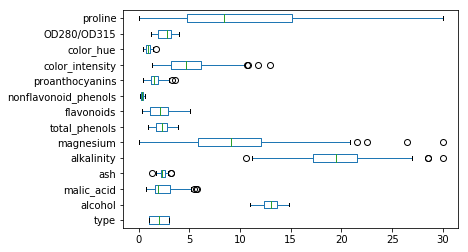

In [14]:
df.plot.box(vert=False)

<div class="alert alert-block alert-success">

Teken een scatterplot die de ``color_hue`` uitzet tegenover de ``color_intensity``. Gebruik per wijnras (``type``) een andere kleur om de markers te tekenen. Wat is het verband tussen deze drie variabelen?

**TIP:** Gebruik hiervoor het ``hue`` attribuut van de ``pairplot`` functie uit Seaborn, of een ``groupby`` operatie uit Pandas voor een MatPlotLib-grafiek.

### Scatter Plot

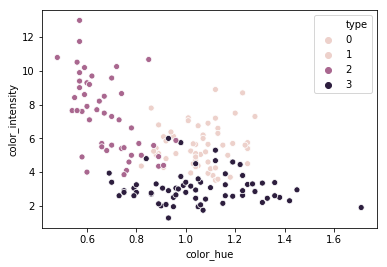

In [15]:
sns.scatterplot(df['color_hue'], df['color_intensity'], df['type'])

### Correlation Plot

<div class="alert alert-block alert-success">

Teken een Pearson-correlatieplot van de dataset (zonder ``type``). Welke variabelen zijn het sterkst met elkaar gecorreleerd? Welke het minst? Kan je op basis van deze plot afleiden welke soort fenolen dominant zijn in wijn: flavonoïdische of niet-flavonoïdische?

**Tip:** Bereken eerst de correlatie-matrix met Pandas, en teken die vervolgens met een ``heatmap`` uit Seaborn.

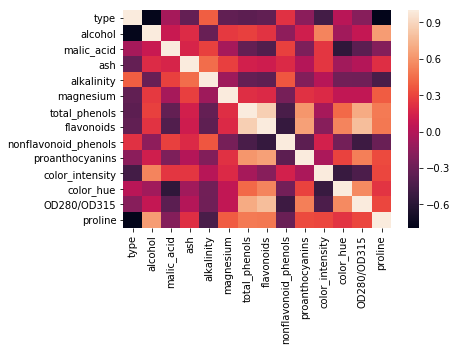

In [16]:
sns.heatmap(df.corr())

### Distribution Plot

<div class="alert alert-block alert-success">

Plot een bivariate [*Kernel Density Estimation*](https://en.wikipedia.org/wiki/Multivariate_kernel_density_estimation) tussen ``alkalinity`` en ``proline`` voor elk ``type``.

**Tip**: Gebruik hiervoor best ``kdeplot`` of de elegantere ``jointplot`` uit Seaborn.

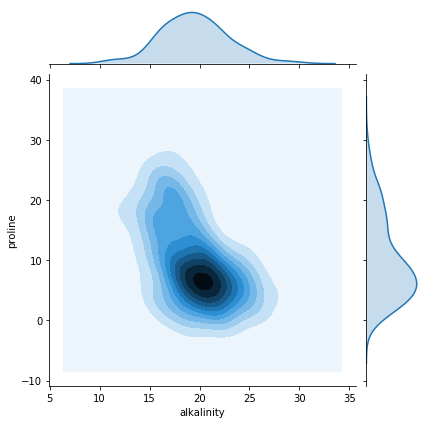

In [17]:
sns.jointplot(x='alkalinity', y='proline', data=df, kind='kde')

## Modelling

In deze stap gaan we een aantal *machine learning* technieken bekijken waarmee we de dataset via een statistisch model met een zo laag mogelijke foutenmarge kunnen voorstellen. Deze modellen bevatten een verzameling aan *model parameters* die via een bepaald algoritme zo gefinetuned worden dat ze een combinatie van *inputs* (de features) in een *output* (de *target*) kunnen transformeren, en dat op een zo correct mogelijke manier.

De algoritmes zelf worden geïnitialiseerd via een reeks *hyperparameters*, die juist gekozen moeten worden om een hoge *model accuracy* te bekomen. Het tweaken van deze parameters is vaak een tijdrovend en delicaat proces. Een té goede keuze kan immers zorgen voor een goede *accuracy* op de data waarmee de training werd uitgevoerd, maar zorgt voor een zware terugval bij testen op het voor het model onbekende data. In zo'n geval is er sprake van *overfitting*.

[Scikit-learn](http://scikit-learn.org/stable/user_guide.html) (``sklearn``) is de populairste toolkit om aan *machine learning* te doen in Python. Deze library is enorm uitgebreid, en het uitproberen van alle functionaliteiten zou zeker te veel tijd kosten in dit labo. Bij de oefeningen staat er dan ook een directe verwijzing naar de juiste subpackage(s), zodat er weinig tijd wordt verloren met het doorlezen van de hele *user guide*.



### Tutorial: Dimensionality Reduction

Aangezien de dataset 13 verschillende features bevat, is het nogal moeilijk om deze allemaal tegelijk voor te stellen in één en dezelfde grafiek. Bij wijze van kennismaking met de Scikit-learn API gaan we de dimensies van de dataset reduceren van 13 naar 2, met een zo klein mogelijk verlies aan informatie. 

De techniek die we hiervoor gebruiken heet [*Principle Component Analysis*](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Principieel is dit een lineaire projectie van de datapunten op een orthogonale ruimte met een lagere dimensie n. De assen van deze ruimte komen overeen met de eigenvectoren van de covariantie-matrix van de oorspronkelijke dataset die horen bij de n grootste eigenwaarden.

**Let op:** Vanaf nu gebruiken we de variabele ``df_wine`` uit [1.2.4](#Wrapping-into-Pandas-ML) voor de analyse!

In onderstaand voorbeeld worden zowel de pure Scikit-learn API als de wrapper-API van Pandas-ML voorgesteld. Aangezien onze data in ``DataFrame``-formaat bestaat en we de resultaten hiermee graag compatibel zouden zien, wordt al snel duidelijk dat de tweede aanpak heel wat eenvoudiger werkt. Wel is er van de eerstgenoemde API veel meer documentatie beschikbaar.

We raden ten sterkste aan om voor de rest van dit labo de **Pandas-ML** methode te volgen. Deze wordt ook gebruikt in het volgende labo, en is eenvoudiger te plotten in combinatie met Seaborn.

#### Pure Scikit-learn API

In [18]:
from sklearn.decomposition import PCA              ## import

pca = PCA(n_components=2)                          ## instantiation
pca.fit(df_wine.data)                              ## fit the PCA model with the data (excluding the target!!!)
df_wine_transformed = pca.transform(df_wine.data)  ## transform the data with the fitted PCA model
                                                   ## note: the two previous steps can be combined 
                                                   ## with fit_transform

df_wine_transformed[:5]                            ## results are in np.ndarray format

array([[ 3.18789797e+02,  2.16208621e+01],
       [ 3.03334274e+02, -5.23608110e+00],
       [ 4.38297693e+02, -6.37089630e+00],
       [ 7.33474251e+02,  4.65473724e-01],
       [-1.13437945e+01,  1.84953419e+01]])

#### Using Pandas-ML

In [19]:
pca = df_wine.decomposition.PCA(n_components=2)  ## import and instantiation
df_wine_transformed = df_wine.fit_transform(pca) ## fit and transform the data

df_wine_transformed.head()                       ## results are in DataFrame format

,type,0,1
0,1,318.789797,21.620862
1,1,303.334274,-5.236081
2,1,438.297693,-6.370896
3,1,733.474251,0.465474
4,1,-11.343794,18.495342


<div class="alert alert-block alert-success">

Teken een scatterplot voor de *components* zoals in stap [1.4.2](#Scatter-plot). 

**Question**: Kan op basis van deze gereduceerde features nog een duidelijk onderscheid tussen de klassen gemaakt worden?

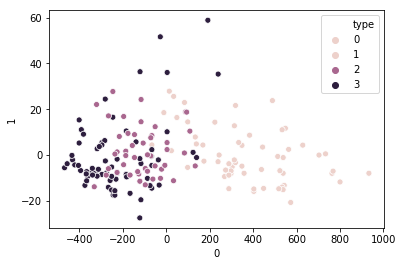

In [20]:
sns.scatterplot(df_wine_transformed[0], df_wine_transformed[1], df_wine_transformed['type'])
# De groepen liggen door elkaar.

### Tutorial 2: Feature Scaling

Zoals beloofd in hoofdstuk [1.2.3](http://localhost:8888/notebooks/labo1.ipynb#Scaling) wordt de hele dataset eerst nog gescaled voor we er modellen mee gaan trainen. Hiervoor gebruiken we de ``MinMaxScaler`` uit [``sklearn.preprocessing``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing). De werking hiervan gebeurt op bijna exact dezelfde manier als in de formule uit 1.2.3. 

#### Train-Test-Split

Zoals reeds aangehaald in de inleiding van dit hoofdstuk mogen we niet de hele dataset gebruiken om *machine learning models* te trainen wegens gevaar op *overfitting*. Via de ``train_test_split`` functie uit [``sklearn.model_selection``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) kunnen we een deel van onze data afzonderen en pas later opnieuw gebruiken als testset wanneer we denken dat het model af is.

We splitsen de dataset op in twee delen met random geselecteerde datapunten: ``train_wine`` en ``test_wine``. De trainingset bevat 70% van de originele data, de testset de overige 30%.

In [21]:
train_wine, test_wine = df_wine.model_selection.train_test_split(test_size=0.3)
print(len(train_wine), len(test_wine))

123 53


#### Feature Scaling

Nu kunnen we onze ``MinMaxScaler`` toepassen op de trainingset. De parameters die we hieruit bekomen worden vervolgens toegepast op de testset.

In [22]:
# fit on train set
scaler = train_wine.preprocessing.MinMaxScaler()
train_wine.fit(scaler)

# apply on train and test set
train_wine = train_wine.transform(scaler)
test_wine = test_wine.transform(scaler)
df_wine = df_wine.transform(scaler)

<div class="alert alert-block alert-success">

Bereken de PCA uit 1.5.1 opnieuw (op ``df_wine``), en teken ook de scatterplot hiervan. Is de conclusie uit de vorige opgave nog steeds geldig?

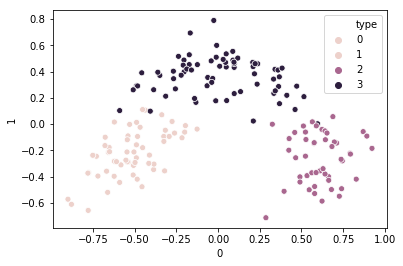

In [23]:
pca = df_wine.decomposition.PCA(n_components=2)  ## import and instantiation
df_wine_transformed = df_wine.fit_transform(pca) ## fit and transform the data

sns.scatterplot(df_wine_transformed[0], df_wine_transformed[1], df_wine_transformed['type'])
# Nu liggen de groepen veel meer appart.

### Train-Test Split

Zoals reeds aangehaald in de inleiding van dit hoofdstuk mogen we niet de hele dataset gebruiken om *machine learning models* te trainen wegens gevaar op *overfitting*. Via de ``train_test_split`` functie uit [``sklearn.model_selection``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) kunnen we een deel van onze data afzonderen en pas later opnieuw gebruiken als testset wanneer we denken dat het model af is.

<div class="alert alert-block alert-success">

Splits de dataset op in twee delen met random geselecteerde datapunten: ``train_wine`` en ``test_wine``. De trainingset moet 70% van de originele data bevatten, de testset de overige 30%.

In [24]:
train_wine, test_wine = df_wine.model_selection.train_test_split(test_size=0.3)
print(len(train_wine), len(test_wine))

123 53


### Decision Tree

Het eerste algoritme dat we zullen bekijken is de *decision tree* uit [``sklearn.tree``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree). In zo'n model wordt stelselmatig een boomstructuur opgesteld waar in elke *node* de data opgesplitst wordt op basis van de waarde van één van de features. De trainingsmethode probeert deze *splits* zodanig te optimaliseren dat de *leafs* enkel datapunten van één bepaalde klasse bevatten.

Bij deze methode is het aantal te leren parameters niet op voorhand vastgelegd, aangezien dit afhangt van de grootte en complexiteit van de dataset. Paradoxaal genoeg worden zulke algoritmes *niet-parametrisch* genoemd, ook al kunnen ze soms veel meer parameters bevatten dan *parametrische* algoritmes.

<div class="alert alert-block alert-success">

Genereer een decision tree op basis van ``train_wine`` die de data classificeert volgens wijntype. Noem het resultaat ``clf_tree``. Teken deze vervolgens met ``graphviz`` (zie User Guide).

In [25]:
# genereer

clf_tree = sklearn.tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(train_wine.drop('type', axis=1), train_wine['type'])

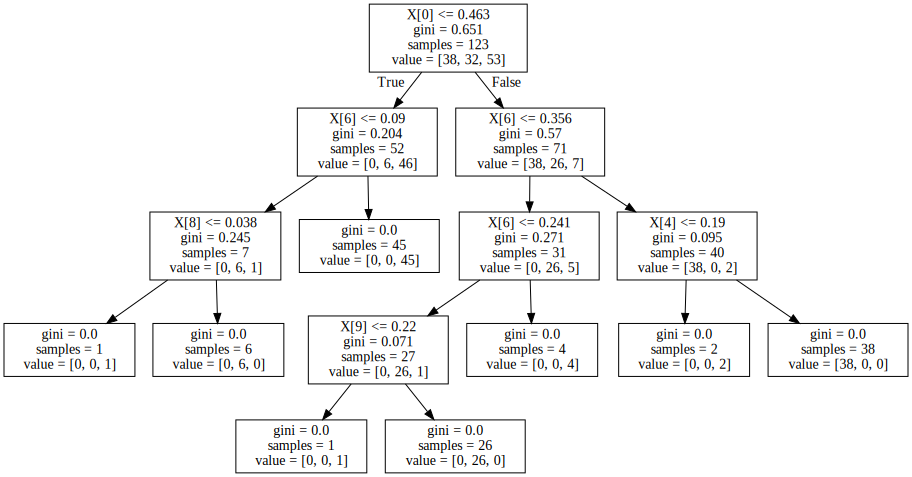

In [26]:
# teken

graphviz.Source(sklearn.tree.export_graphviz(clf_tree))

<div class="alert alert-block alert-success">

**Question:** Voer de training van de decision tree opnieuw uit, maar vervang ``train_wine`` telkens door ``train_wine.inverse_transform(scaler)`` (de originele, niet-gescalede waarden). Teken ook de boom opnieuw.
Wat valt op? Welke van de twee bomen zou je het liefst gebruiken als classifier?

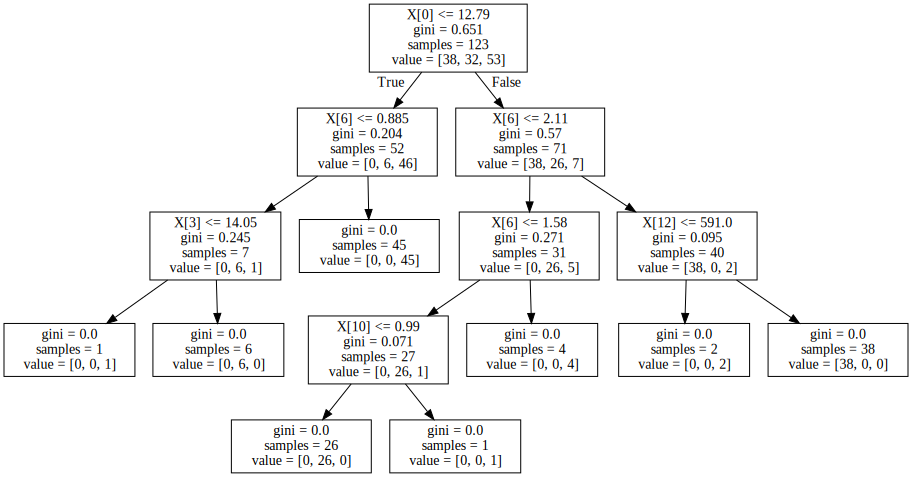

In [27]:
clf_tree = sklearn.tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(train_wine.inverse_transform(scaler).drop('type', axis=1), train_wine.inverse_transform(scaler)['type'])
graphviz.Source(sklearn.tree.export_graphviz(clf_tree))

### Support Vector Machine

De Support Vector Machine (SVM) uit [``sklearn.svm``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm) is het tweede algoritme dat we gaan bekijken. Een SVM construeert een [*hyperplane*](https://en.wikipedia.org/wiki/Hyperplane) dat de klassen van elkaar scheidt. De kracht van de SVM zit in het optimalisatiemechanisme, waarbij de *margin*, de afstand tussen het hyperplane en het dichtsbijliggende datapunt van elke klasse, gemaximaliseerd wordt. In het geval dat er meer dan twee klassen zijn, wordt er voor elke twee klassen een aparte SVM getraind (in totaal ``n * (n-1) / 2`` modellen); voor het eindresultaat worden de scores hiervan gecombineerd.

<div class="alert alert-block alert-success">

Genereer een SVM op basis van ``train_wine`` die de data classificeert volgens wijntype. Noem het resultaat ``clf_svm``.

### Multilayer Perceptron

De laatste classifier die onderzocht wordt komt uit de familie van *neurale netwerken*. Het Multilayer Perceptron (MLP) is een netwerk dat bestaat uit een *input layer* en een *output layer*, met daartussen een aantal *hidden layers* die elk een aantal *nodes* bevatten. In elke *node* worden de waarden uit alle nodes van de vorige layer samen met een *bias* lineair gecombineerd en vervolgens door een niet-lineaire *activatiefunctie* gehaald. Door de parameters van deze lineaire combinaties te trainen op de dataset, kan dit netwerk een niet-lineaire functie vormen die de dataset-mapping van features naar target heel dicht benadert. Een nadeel van deze techniek is wel dat er relatief veel trainingsdata moet zijn om tot een acceptabel resultaat te komen.

<img src="http://scikit-learn.org/stable/_images/multilayerperceptron_network.png" alt="MLP Structure" width=300/>

De [``sklearn.neural_network``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network) module bevat enkele klassen om met MLPs te werken. 

<div class="alert alert-block alert-success">

Creëer een multilayer perceptron op basis van ``train_wine`` die de data classificeert volgens wijntype. Noem het resultaat ``clf_mlp``. Gebruik ``'lbfgs'`` en zet het maximum aantal trainingsiteraties op 20000. Maak gebruik van de volgende structuur voor de hidden layers:
* hidden layer 1: 20 nodes
* hidden layer 2: 15 nodes
* hidden layer 3: 10 nodes
* hidden layer 4: 5 nodes

<div class="alert alert-block alert-success">

**Question:** Wat is het totaal aantal *weights* of parameters dat door dit netwerk getraind moet worden (exclusief biases)? Is dit een parametrisch of niet-parametrisch model?

## Cross-Validation

Nu we onze modellen gedefinieerd hebben, willen we uiteraard ook graag weten hoe goed ze presteren voordat we ze uiteindelijk loslaten op onze échte testdata. Er is echter een groot probleem: we hebben geen extra data meer over om deze tussentijdse test uit te voeren! We hadden deze uiteraard eerder kunnen afsplitsen van de trainingset, maar dan zou die laatste voor de algoritmes wel héél klein geworden zijn om performante modellen te genereren.

De oplossing vinden we onder de vorm van *cross validation*. Bij deze techniek wordt de trainingsset niet één, maar meerdere keren opgesplitst in een (kleinere) training- en validatieset. Bij elk van deze splitsingen wordt de *accuracy score* van het model berekend, en het gemiddelde van deze scores vormt dan de *cross validation score*. Deze score blijkt in de meeste gevallen vrij representatief te zijn voor de uiteindelijke performance op de testset, en door het gebruik van de splitsingen is er geen extra data nodig om testen te doen.

In [``sklearn.model_selection``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) vinden we de ``cross_val_score`` functie terug, samen met een aantal *splitters*. 

<div class="alert alert-block alert-success">

* Maak een ``ShuffleSplit`` object aan met 10 splits.
* Bereken de *cross validation score* voor de drie modellen, gebruikmakend van die ``ShuffleSplit``.

**Question**: Welk model presteert het best?

In [28]:
# ShuffleSplit

In [29]:
# cross validation score

## Prediction and Performance

*Finally, the big moment has arrived!* Het is tijd om de testdata erbij te halen en te kijken hoe goed (of hoe slecht) onze modellen het doen op onbekende data. [``sklearn.metrics``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) bevat een groot aantal methodes om de *performance* van een model numeriek of grafisch voor te stellen.

<div class="alert alert-block alert-success">

Doe de volgende stappen voor elk van de drie modellen (hier ``clf`` genoemd):
1. Hertrain ``clf`` op de volledige trainingset (``train_wine``).
2. Ken ``clf`` toe aan het ``estimator`` attribuut van ``test_wine`` (enkel van toepassing bij gebruik van Pandas-ML API).
3. Bereken de ``accuracy_score`` op ``test_wine`` met de hertrainde ``clf``.
4. Print of teken de *confusion matrix* van ``test_wine``.

**Question:** Welke classifier presteert het beste op de testset? Komt dit overeen met de bevindingen uit de cross-validatiescores? Waardoor zou een mismatch tussen *accuracy score* en *cross validation score* kunnen onstaan?